In [1]:
import torch
from torch import nn #importing an neural network library/module
from torch.utils.data import DataLoader #create groups of data,pass to NN and find the o/p and compute loss(batch processing/mini batch gradient decent)
'''
Gradient descent - All the datapoints - compute output - compute loss - gradient descent
stochastic Gradient descent - single datapoint - compute o/p - compute loss - gradient descent - next datapoint
Mini batch gradient descent - create batches of data - compute ouput for each batch - gradient descnt - next batch
'''
from torchvision import datasets #download the dataset
from torchvision.transforms import ToTensor #used to convert the input to torch tensor format(scaling)
import matplotlib.pyplot as plt
import torch.nn.functional as F #relu and sigmoid func

# download the dataset

In [2]:
training_data = datasets.FashionMNIST(root='data',train=True,download=True,transform=ToTensor())
testing_data = datasets.FashionMNIST(root='data',train=False,download=True,transform=ToTensor())

100%|██████████| 26421880/26421880 [00:02<00:00, 11000370.64it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 175168.22it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3256773.35it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6445455.82it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(training_data)

60000

In [4]:
torch.randint(len(training_data),size=(1,)).item()

26719

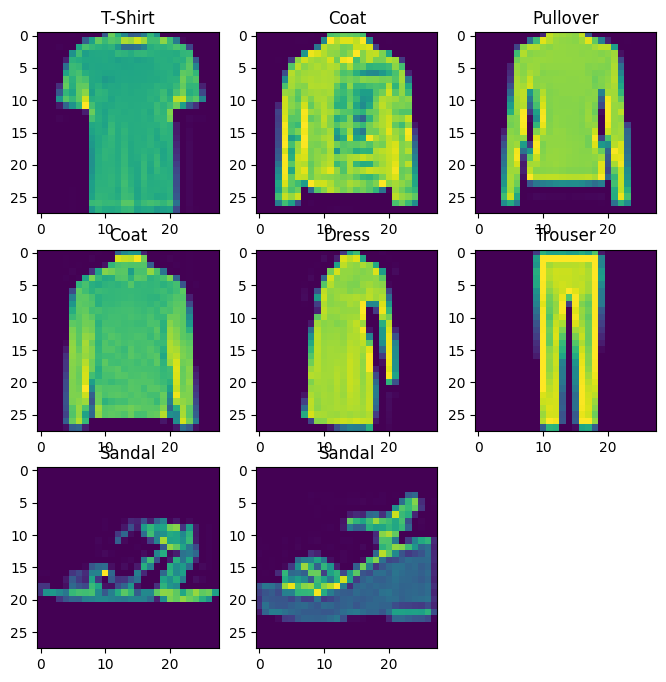

In [5]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols, rows=3,3

for i in range(1,rows*cols):
  sample_index=torch.randint(len(training_data),size=(1,)).item()
  img, label = training_data[sample_index]
  figure.add_subplot(rows,cols,i)
  plt.title(labels_map[label])
  plt.imshow(img.squeeze())

# Batching

In [6]:
batch_size=64

train_dataloader = DataLoader(training_data,batch_size=batch_size)
test_dataloader = DataLoader(testing_data,batch_size=batch_size)

# Model creation

In [7]:
class modelcre(nn.Module): #

  def __init__(self):
    super(modelcre,self).__init__()

    ## Init function is used to define the architecture blocks
    self.flatten = nn.Flatten() # 28 x 28 x1 - 764 x 1 vectpor
    self.layer1 = nn.Linear(28*28,512)
    self.layer2 = nn.Linear(512,256)
    self.layer3 = nn.Linear(256,10)

  def forward(self,x):
    x = self.flatten(x)
    x = self.layer1(x)
    x = F.relu(x) #F.sigmoid()
    x = self.layer2(x)
    x = F.sigmoid(x)
    x = self.layer3(x)
    return x

In [8]:
if torch.cuda.is_available():
  device='cuda' #parallel processing,slow,large data
else:
  device='cpu' #general purpose

In [9]:
model= modelcre()
model.to(device) #to check th device cuda or cpu
model

modelcre(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=784, out_features=512, bias=True)
  (layer2): Linear(in_features=512, out_features=256, bias=True)
  (layer3): Linear(in_features=256, out_features=10, bias=True)
)

In [10]:
## loss function and optimizer
loss_fn = nn.CrossEntropyLoss() #classification,regression-mse
optimizer = torch.optim.SGD(model.parameters(),lr = 1e-2) #socastic gradient descent,lr-learning rate 0-1

In [11]:
def training_loop(dataloader,model,loss_fn,optimizer): #optimizer(gradient descent)
  model.train()

  #pass every batch of data to the model
  for batch, (X,y) in enumerate(dataloader):
    X = X.to(device)
    y = y.to(device)

    pred = model(X)
    loss = loss_fn(pred,y)
    optimizer.zero_grad() #previous gradient values(zero)
    loss.backward() #gradients compute(weights and bias, find loss,adjust the weights and bias for minimum loss)
    optimizer.step() #sgd (update the weights)


    if batch % 100 == 0:
      print (f'loss : {loss.item()}') #to check the all batches(item-prints the loss for each input)

In [12]:
## testing the model
def testing_loop(dataloader,model,loss_fn): #no optimizer
  model.eval()
  test_loss = 0 #loss percentage
  correct = 0
  for X,y in dataloader:
    X = X.to(device)
    y = y.to(device)

    pred = model(X)
    # print (pred.shape)
    # print (pred)
    # print (pred.argmax(1)) #the input tensor exists with multiple maximal values then the function will return the index of the first maximal element
    # print (y) #device
    # print (pred.argmax(1) == y)
    # print ((pred.argmax(1) == y).type(torch.float)) #to convert into float
    # print ((pred.argmax(1) == y).type(torch.float).sum() #prints the count of max values
    correct += (pred.argmax(1) == y).type(torch.float).sum().item() #prints the correct values
    test_loss += loss_fn(pred,y).item() #loss items in test data
  test_loss = test_loss/len(dataloader) #percentage
  print (len(dataloader.dataset))
  accuracy = (correct/len(dataloader.dataset))*100
  print (f'Accuracy : {accuracy} with test error {test_loss}')

In [13]:
epochs = 3 #how many times you have to send data to the model
for t in range(epochs):
  training_loop(train_dataloader,model,loss_fn,optimizer)
  testing_loop(test_dataloader,model,loss_fn)
  print(f' ==================== EPOCH : {t} ============================')

loss : 2.281278133392334
loss : 2.2907581329345703
loss : 2.269174337387085
loss : 2.253885507583618
loss : 2.188595771789551
loss : 2.1629796028137207
loss : 2.0880303382873535
loss : 1.9648207426071167
loss : 1.8429203033447266
loss : 1.7124751806259155
10000
Accuracy : 52.739999999999995 with test error 1.6664665755192944
 ==================== EPOCH : 0 ============================
loss : 1.7032427787780762
loss : 1.6112231016159058
loss : 1.4259521961212158
loss : 1.4474163055419922
loss : 1.2775342464447021
loss : 1.3010714054107666
loss : 1.249386191368103
loss : 1.1676079034805298
loss : 1.1910032033920288
loss : 1.1275867223739624
10000
Accuracy : 63.46000000000001 with test error 1.1007759498942429
 ==================== EPOCH : 1 ============================
loss : 1.1705613136291504
loss : 1.1302084922790527
loss : 0.9600146412849426
loss : 1.0861304998397827
loss : 0.9464592933654785
loss : 1.0056722164154053
loss : 1.0030579566955566
loss : 0.9265007376670837
loss : 0.95243